Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


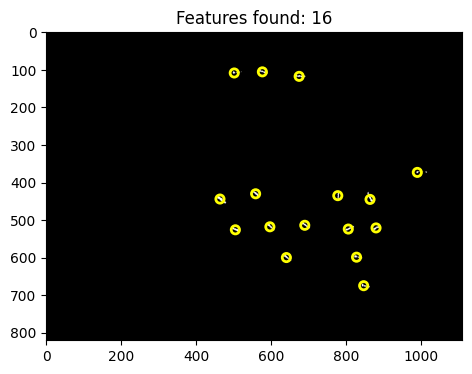

In [1]:

from skimage import feature, color
import numpy
import rasterio 
import matplotlib.pyplot as plt


filename = 'S1A_IW_GRDH_1SDV_20231203T020307_20231203T020332_051484_0636C5_vh_subset.tif'
with rasterio.open(filename) as input:
    # blob_dog method requires data to be a floating point type
    image = input.read(1).astype(numpy.float32)
    # Filter images to DN that are less than 200 to 0 to remove the chance of 
    # speckle in the image being used. 
    image = image * (image > 200).astype(int)
    # Get a list of the features that are detected, and convert it to a set
    # to remove duplicates.
    features = set([(x[0],x[1],x[2]) 
                 for x in feature.blob_dog(image, 
                                           min_sigma=10, 
                                           max_sigma=20, 
                                           threshold=1, 
                                           overlap=0.6)])
    # Display the image with found features to verify the process.
    features_image = color.gray2rgb(image)
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1,1,1)
    # This loop generates circle symbols to indicate where a feature was found.
    for y, x, r in features:
        c = plt.Circle((x, y), r+1, color='yellow', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.imshow(features_image)
    plt.title(f'Features found: {len(features)}')
    plt.show()